# 2_2 . Analysis of TE annotation
Manuel Jara-Espejo$^{1}$\
Aboobaker lab, Department of Biology, University of Oxford

## Contents of notebook
1. Introduction
2. Representation of TE families comparison between *Phaw5.0* and *Phaw5.1* assemblies
3. TE families prevalence within the genome
4. Analyse TE distribution in Phaw5.1 genome

### 1. Introducion

### 2. Representation of TE families comparison between *Phaw5.0* and *Phaw5.1* assemblies

In [1]:
library(tidyr)
library(tidyverse)
library(dplyr)
library(reshape2)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.5
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘reshape2’ was built under R version 4.0.5”

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [5]:
directory= "/drives/ssd1/manuel/phaw/2022_analysis/te_analysis/"
#setwd(directory)

#Create a dataframe containing the percenatge and number of TEs per families. Numbers were extracted from statitsic output files generated by RepeatMasker.
#For Phaw5.1 the data is in:/drives/raid/AboobakerLab/manuel/data_phaw_analysis/repeats_gapFilledAsm/phaw_sambaAsm.scaff_seqs_editedScafNames.fa.tbl

class <- c("SINE","LINE","LTR","DNA","Rolling-circles","Small-RNA","Satellites", "Simple-repeats","Low-complexity","Unclassified")
phaw_5.0perc <- c(0.01,8.07,0.23,3.54, 0.20, 0.02, 0.03, 0.50, 0.03, 32.16)
phaw5.0_count <- c(643, 636855, 15816, 293942, 25186, 2573, 1741, 262361, 15048, 4417347)
phaw_5.1perc <- c(0.0,11.78,0.91,4.23, 0.18, 0.00, 0.02, 0.65, 0.03, 38.75)
phaw_5.1_count <- c(0.0,644713,47932,315692, 40890, 0.00, 4697, 323041, 17107, 4775697)

repetitions <- data_frame(class,phaw_5.0perc,phaw5.0_count,phaw_5.1perc,phaw_5.1_count)
repetitions

class,phaw_5.0perc,phaw5.0_count,phaw_5.1perc,phaw_5.1_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SINE,0.01,643,0.00,0
LINE,8.07,636855,11.78,644713
LTR,0.23,15816,0.91,47932
DNA,3.54,293942,4.23,315692
Rolling-circles,0.20,25186,0.18,40890
Small-RNA,0.02,2573,0.00,0
Satellites,0.03,1741,0.02,4697
Simple-repeats,0.50,262361,0.65,323041
Low-complexity,0.03,15048,0.03,17107


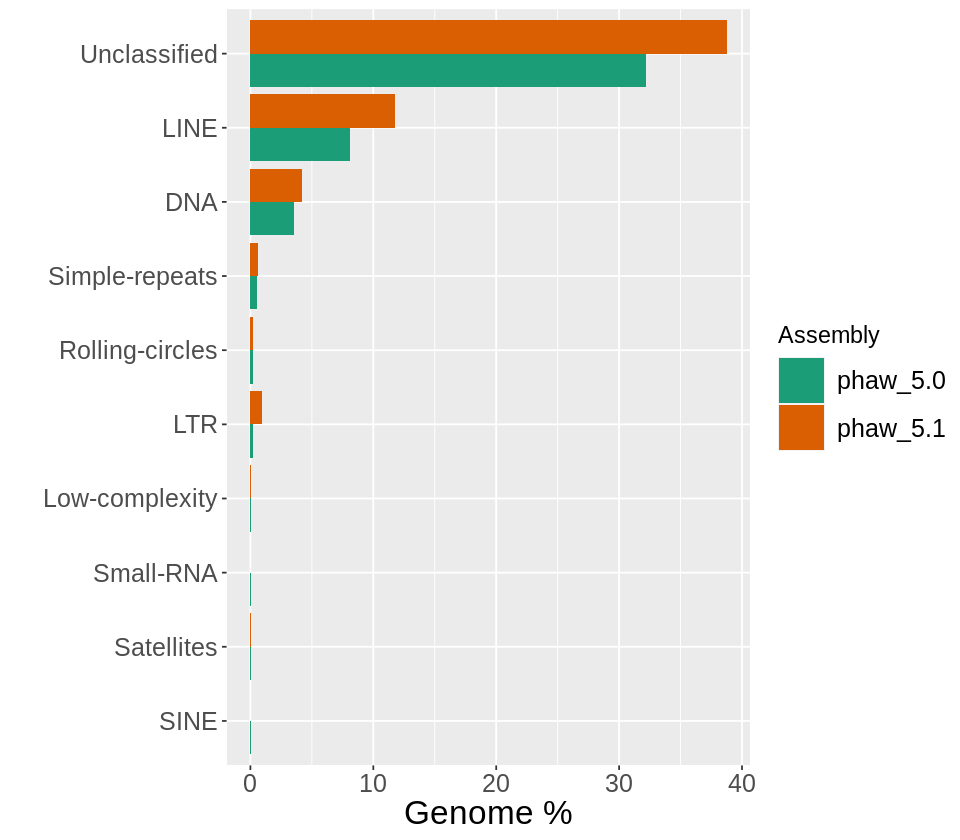

In [15]:
#Plot results
options(repr.plot.width=8, repr.plot.height=7)

repetitions %>% melt(id.vars = c("class"))  %>%   filter(grepl("perc",variable)) %>% rename(temp = variable) %>% 
mutate(Assembly= gsub("perc","",temp)) %>%
mutate(class= factor(class,levels = rev(c("Unclassified","LINE","DNA","Simple-repeats","Rolling-circles","LTR","Low-complexity","Small-RNA","Satellites","SINE")))) %>%
ggplot(aes(x=class, y=value, fill=Assembly)) +
    geom_bar(stat='identity', position='dodge') + coord_flip() +
scale_fill_brewer(palette="Dark2")+
scale_color_brewer(palette="Dark2") +
ylab("Genome %") + xlab("") +
  theme(axis.title =element_text(size=20),
        axis.text = element_text(size=15),
        legend.text = element_text(size = 15), 
        legend.title = element_text(size = 14), 
        legend.key.size = unit(1, 'cm'))

### 3. TE families prevalence within the genome

In [2]:
library(tidyr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.5
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘reshape2’ was built under R version 4.0.5”

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
te_families = read.table("/drives/ssd1/manuel/phaw/2022_analysis/te_analysis/te_expression/TE_Id_Family_full.txt",header = F,stringsAsFactors = F,sep = "\t")
te_families <- te_families %>% separate(col=V2, into=c("scaff","start", "end"),sep = ":") %>%
  mutate(TE= paste(scaff,start,end,sep=","),teFamily = V3) %>% select(TE,teFamily)
te_families <- te_families  %>% separate(teFamily, into = c("family","subFam"),sep= "/",remove = F)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 5216348 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,TE,teFamily,family,subFam
,<chr>,<chr>,<chr>,<chr>
1,"Scaffold_100013_HRSCAF_104023,346,374",Unknown,Unknown,NA
2,"Scaffold_100032_HRSCAF_104042,216,512",Unknown,Unknown,NA
3,"Scaffold_100414_HRSCAF_104425,136,229",Unknown,Unknown,NA
4,"Scaffold_100_HRSCAF_734,43181,43270",Unknown,Unknown,NA
5,"Scaffold_101355_HRSCAF_105366,263,507",Unknown,Unknown,NA


In [9]:
te_families %>% sample_n(5)

TE,teFamily,family,subFam
<chr>,<chr>,<chr>,<chr>
"Scaffold_283817_HRSCAF_291653,60241083,60241330",LTR/Gypsy,LTR,Gypsy
"Scaffold_283743_HRSCAF_291404,13802958,13802998",Unknown,Unknown,NA
"Scaffold_283829_HRSCAF_291665,45627201,45628541",DNA/TcMar-Tc1,DNA,TcMar-Tc1
"Scaffold_282543_HRSCAF_287481,20574629,20574844",Unknown,Unknown,NA
"Scaffold_N1381,58811762,58811943",Unknown,Unknown,NA


In [21]:
#Families represented in TE annotation (%)
te_families %>% group_by(teFamily) %>%
  summarise(n = n()) %>%
  mutate(freq = (n / sum(n))*100) %>% head(10)

teFamily,n,freq
<chr>,<int>,<dbl>
DNA,3324,0.05244734
DNA/Academ-1,1534,0.02420404
DNA/CMC-Chapaev-3,2999,0.04731936
DNA/Ginger-2,1419,0.02238952
DNA/hAT,2407,0.03797856
DNA/hAT-Ac,5868,0.09258754
DNA/hAT-Blackjack,2779,0.04384812
DNA/hAT-Charlie,15249,0.24060453
DNA/hAT-hAT19,5440,0.08583439


### 4. Analyse TE distribution in Phaw5.1 genome

##### Call bed files containing TEs in specific features

In [23]:
intronicTEs = read.table("/drives/ssd1/manuel/phaw/2022_analysis/te_analysis/te_methylation/intronicTEs.bed",header = F,stringsAsFactors = F,sep = "\t")
intronicTEs <- intronicTEs %>% mutate(TE = paste(V1,V2,V3,sep=",")) %>% select(TE,V6,V10)

exonicTEs = read.table("/drives/ssd1/manuel/phaw/2022_analysis/te_analysis/te_methylation/exonicTEs.bed",header = F,stringsAsFactors = F,sep = "\t")
exonicTEs <- exonicTEs %>% mutate(TE = paste(V1,V2,V3,sep=",")) %>% select(TE,V6,V10)

intergenicTEs = read.table("/drives/ssd1/manuel/phaw/2022_analysis/te_analysis/te_methylation/intergenicTEs.bed",header = F,stringsAsFactors = F,sep = "\t")
intergenicTEs <- intergenicTEs %>% mutate(TE = paste(V1,V2,V3,sep=",")) %>% select(TE,V6)

`summarise()` has grouped output by 'family'. You can override using the `.groups` argument.



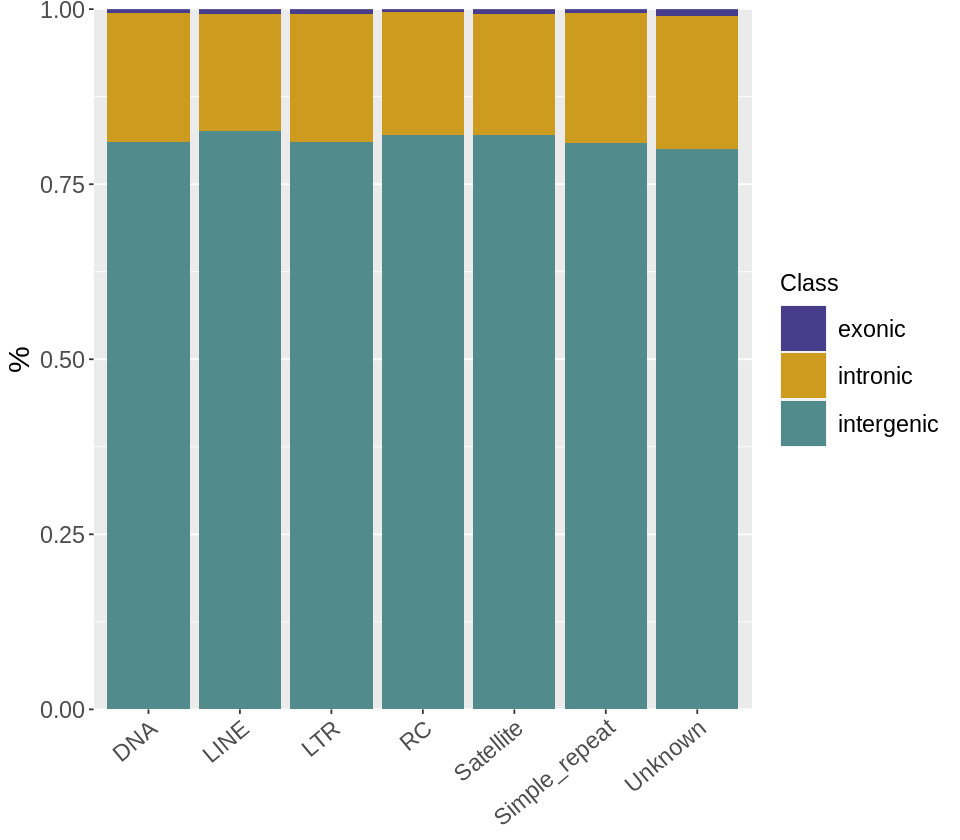

In [29]:
options(repr.plot.width=8, repr.plot.height=7)

TE_distriutionbyFam <- te_families %>% #sample_n(30000) %>%
mutate(Class = ifelse(TE %in% intronicTEs$TE, "intronic",
                      ifelse(TE %in% exonicTEs$TE,"exonic","intergenic"))) %>%
  mutate(Class = factor(Class,levels = c("NA","exonic","intronic","intergenic"))) %>% 
  arrange(Class) %>% filter(Class != "NA") %>% 
  group_by(family,Class) %>% dplyr::summarise(n=n()) %>%
  ggplot(aes(fill =Class,x=family,y=n)) + 
  geom_bar(position="fill", stat="identity") + ylab("%")+ xlab(NULL) +
  scale_fill_manual(values = c("darkslateblue","goldenrod3","darkslategray4")) +
  scale_y_continuous(expand = c(0, 0)) +
  theme(axis.text.x = element_text(size = 14,angle=40,hjust = 1),axis.title = element_text(size = 18),
        axis.text.y = element_text(size = 14),legend.title = element_text(size = 14), legend.text = element_text(size = 14),
        legend.key.size = unit(1, 'cm'))

#tiff("TE_distriutionbyFam.tiff", width = 5, height = 4, units = "in",res = 400,compression = "lzw")
TE_distriutionbyFam
#dev.off()
